In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('../data/iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


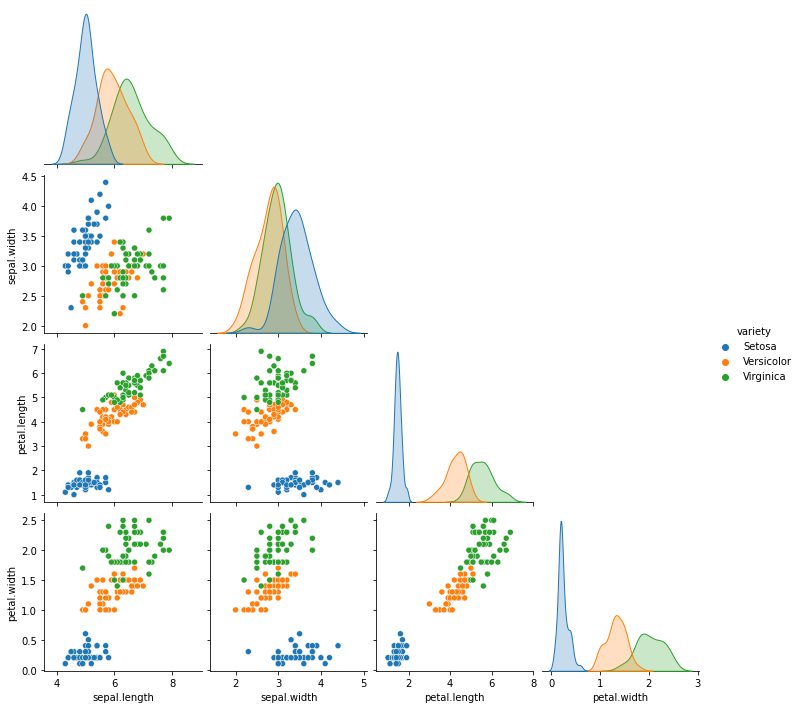

In [4]:
sns.pairplot(iris, vars=iris.columns[:4], hue='variety', corner=True)
plt.show()

In [5]:
setosa = iris[iris['variety'] == 'Setosa']
versicolor = iris[iris['variety'] == 'Versicolor']
virginica = iris[iris['variety'] == 'Virginica']

seed = 105

train_set = pd.concat([setosa.sample(n=35, random_state=seed),
                       versicolor.sample(n=35, random_state=seed),
                       virginica.sample(n=35, random_state=seed)])
test_set = iris.drop(index=train_set.index)

In [6]:
train_set.variety.value_counts()

Setosa        35
Versicolor    35
Virginica     35
Name: variety, dtype: int64

In [7]:
def knn(vector, dataset, k):
    distance = np.sqrt(sum([(dataset[category] - vector[category]) ** 2
                            for category in vector.index[:-1]]))
    distance.index = dataset.iloc[:, -1]
    return distance.nsmallest(k).index.to_series().mode()[0]

In [8]:
scores = []

for k in range(1, len(test_set)+1):
    predicted = test_set.apply(lambda x: knn(x, train_set, k), axis=1)
    scores.append(sum(test_set.variety == predicted) / len(test_set) * 100)

scores = pd.Series(scores, index=range(1, len(test_set)+1))
scores

1    93.333333
2    93.333333
3    93.333333
4    93.333333
5    95.555556
dtype: float64

In [24]:
scores

1     93.333333
2     93.333333
3     93.333333
4     93.333333
5     95.555556
6     97.777778
7     97.777778
8     97.777778
9     97.777778
10    97.777778
11    97.777778
12    97.777778
13    97.777778
14    95.555556
15    97.777778
16    95.555556
17    97.777778
18    97.777778
19    97.777778
20    95.555556
21    97.777778
22    95.555556
23    95.555556
24    95.555556
25    93.333333
26    95.555556
27    95.555556
28    95.555556
29    95.555556
30    95.555556
31    95.555556
32    95.555556
33    95.555556
34    95.555556
35    95.555556
36    95.555556
37    95.555556
38    95.555556
39    93.333333
40    91.111111
41    93.333333
42    91.111111
43    91.111111
44    88.888889
45    91.111111
dtype: float64

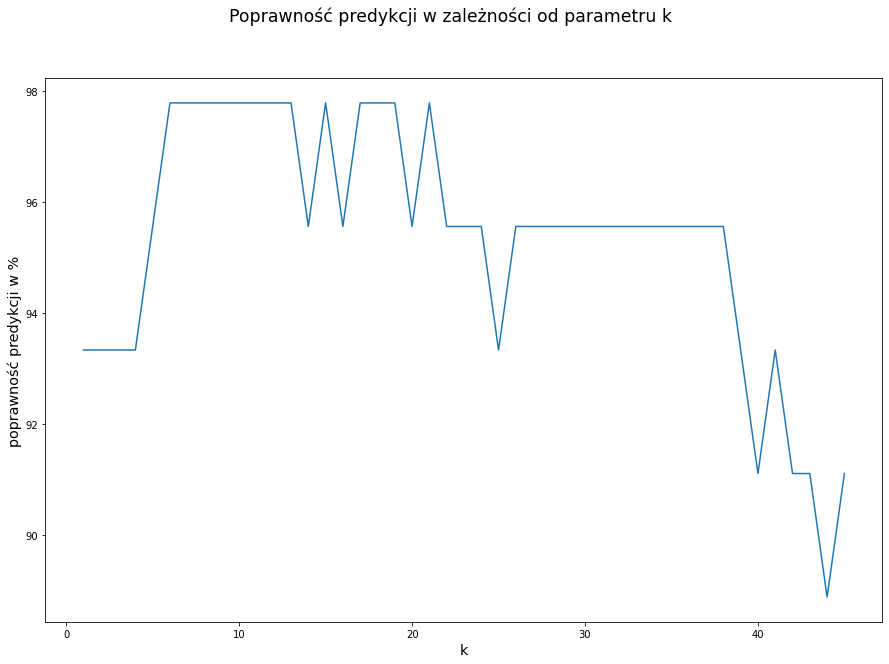

In [9]:
fig, ax = plt.subplots()

sns.lineplot(y=scores, x=scores.index, ax=ax)

fig.set_size_inches(15, 10)
plt.suptitle('Poprawność predykcji w zależności od parametru k', size='xx-large')
plt.xlabel('k', fontdict={'fontsize': 'x-large'})
plt.ylabel('poprawność predykcji w %', fontdict={'fontsize': 'x-large'})
plt.show()

In [23]:
vec = test_set .iloc[1, :]
vec = pd.Series((1, 2, 3, 4, 'Setosa'), index=vec.index)
print(knn(vec, train_set, 3))

Versicolor


In [11]:
predictions = test_set.apply(lambda x: knn(x, train_set, 3), axis=1)
test_set_preds = pd.concat([test_set, predictions], axis=1)
test_set_preds.rename(columns={0: 'predictions'}, inplace='True')
test_set_preds.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,predictions
0,5.1,3.5,1.4,0.2,Setosa,Setosa
1,4.9,3.0,1.4,0.2,Setosa,Setosa
6,4.6,3.4,1.4,0.3,Setosa,Setosa
9,4.9,3.1,1.5,0.1,Setosa,Setosa
15,5.7,4.4,1.5,0.4,Setosa,Setosa


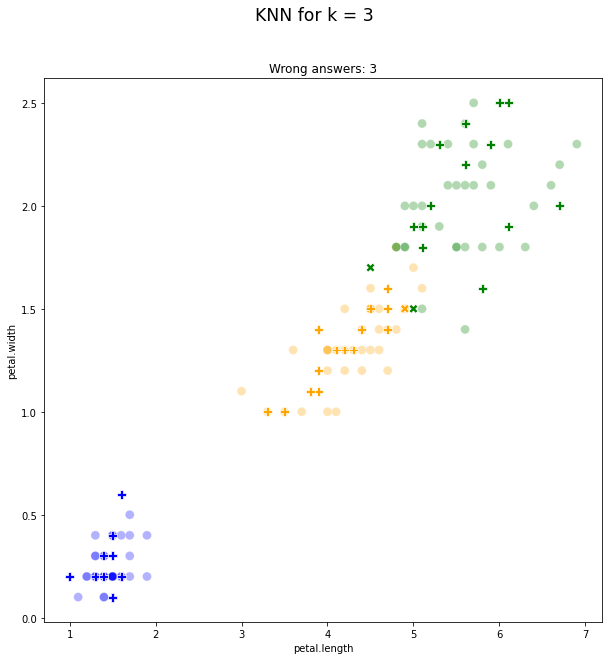

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

colors = {
    'Setosa': 'blue',
    'Versicolor': 'orange',
    'Virginica': 'green'
}

true_preds = test_set_preds.variety == test_set_preds.predictions
markers = true_preds.apply(lambda x: 'o' if x else 'x')

test_set_edges = ['red' for i in range(len(test_set_preds[~true_preds]))]#test_set_preds[~true_preds].predictions.map(lambda x: colors[x])
colors1 = train_set.variety.map(lambda x: colors[x])
colors2 = test_set_preds[true_preds].variety.map(lambda x: colors[x])
colors3 = test_set_preds[~true_preds].variety.map(lambda x: colors[x])

sns.scatterplot(data=train_set, x='petal.length', y='petal.width', c=colors1, ax=ax, s=80, alpha=.3)
sns.scatterplot(data=test_set_preds[true_preds], x='petal.length', y='petal.width', c=colors2, ax=ax, s=80, marker="P")
sns.scatterplot(data=test_set_preds[~true_preds], x='petal.length', y='petal.width', c=colors3, ax=ax, s=80, marker="X")


plt.suptitle("KNN for k = 3", size='xx-large')
plt.title(f"Wrong answers: {len(colors3)}")
plt.show()
# plt.savefig('fig.jpg')